<a href="https://colab.research.google.com/github/aman-singhsm01/Loan_Approval_Prediction/blob/main/Loan_Approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and preprocessing


In [2]:
#loading the dataset to pandas dataframe
loan_dataset=pd.read_csv('/content/drive/MyDrive/datasets/loan_dataset.csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#no of rows and col
loan_dataset.shape

(614, 13)

In [7]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [33]:
#no of missing values in each col
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
#drop all the missing values
loan_dataset=loan_dataset.dropna()

In [35]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
#label encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [46]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,No,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [38]:
#Dependent column values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [39]:
#since we cannot 3+ value so instead replace it with 4
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [40]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

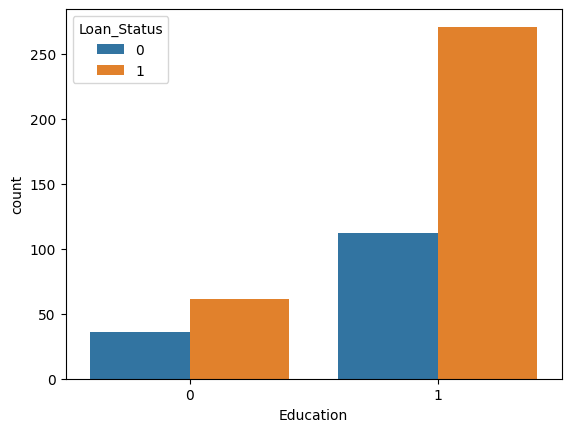

In [41]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

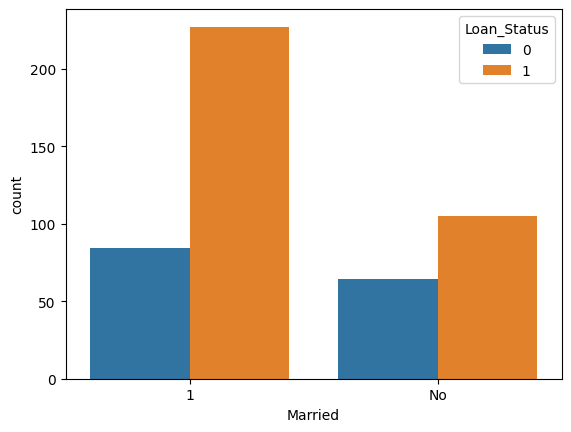

In [42]:
#marital status and loan status
sns.countplot(x="Married",hue='Loan_Status',data=loan_dataset)

In [47]:
#Convert categorical columns into numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2  },'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [48]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [49]:
#Separate data and labels and drop loanId
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2 )

In [51]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:Support Vector machine

In [52]:
classifier=svm.SVC(kernel='linear')

In [53]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [55]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [56]:
print("Accuracy of training data :",training_data_accuracy)

Accuracy of training data : 0.7986111111111112


In [57]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy of test data :",test_data_accuracy)

Accuracy of test data : 0.8333333333333334


Make predictive system

In [64]:
input_data=(1,1,2,1,0,4006,1526,168,360,1,2)
input_data_as_numpy_array=np.asarray(input_data)

#Reshape the np array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#make prediction
prediction=classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Loan not approved")
else:
  print("Loan is approved")

[1]
Loan is approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
